In [1]:
#import libraries
import pandas as pd
import numpy as np
import os

In [2]:
path = r'C:\Users\dbnew\Instacart_Basket_Analysis_31_03-2022'

In [ ]:
pip install pyarrow

In [3]:
df_insta = pd.read_parquet(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust/'))

In [ ]:
pd.set_option('display.max_columns', 50)

In [ ]:
df_insta.head()

In [8]:
df_insta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32429932 entries, 0 to 8844531
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                float64 
 1   user_id                 float64 
 2   order_number            float64 
 3   orders_day_of_week      float64 
 4   order_hour_of_day       float64 
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       float64 
 8   reordered               float64 
 9   product_name            object  
 10  aisle_id                float64 
 11  department_id           float64 
 12  prices                  float64 
 13  first_merge             category
 14  price_range             object  
 15  busiest_slowest         object  
 16  busy_hours              object  
 17  max_order               float64 
 18  loyalty_flag            object  
 19  mean_spending           float64 
 20  Spender Type            object  
 21  median_

In [ ]:
## Dropping personally identifiable information (PII)
df_insta.drop(['first_name', 'surname'], axis=1, inplace=True)

In [ ]:
df_insta.head()

In [ ]:
##Renaming 'Spender Type' as 'spender_type' for consistency
df_insta.rename(columns = {'Spender Type' : 'spender_type'}, inplace = True)

In [ ]:
df_insta.head()

In [ ]:
##Flagging northeast states in new column 'region'
df_insta.loc[df_insta['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region']='Northeast'

In [ ]:
##Importing US state regions excel file based on https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States
df_regions=pd.read_excel(r'C:\Users\dbnew\OneDrive\Documents\Python_General\State_Regions.xlsx', sheet_name=0)

In [ ]:
##Creating midwest list for eventual flagging with the loc function.
midwest=list(df_regions['Midwest'])

In [ ]:
print(midwest)

In [ ]:
##Creating south list for eventual flagging with the loc function.
south=list(df_regions['South'])

In [ ]:
print(south)

In [ ]:
##Creating south list for eventual flagging with the loc function.
west=list(df_regions['West'])

In [ ]:
print(west)

In [ ]:
##Flagging midwest states in column 'region'
df_insta.loc[df_insta['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region']='Midwest'

In [ ]:
##Flagging southern states in column 'region'
df_insta.loc[df_insta['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region']='South'

In [ ]:
##Flagging western states in column 'region'
df_insta.loc[df_insta['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California','Hawaii']), 'region']='West'

In [ ]:
df_insta.head()

In [ ]:
##Checking flagging operation
df_insta['region'].value_counts(dropna=False)

In [ ]:
crosstab = pd.crosstab(df_insta['region'], df_insta['spender_type'], dropna = False)

In [ ]:
crosstab

In [ ]:
## Copying to excel to caclulate percentage of high spenders by region
crosstab.to_clipboard()

In [ ]:
##Importing dataframe from excel showing percentages of high spenders by region
big_spenders_by_region = pd.read_excel(os.path.join(path, '04 Analysis', 'Reports', 'Spending_By_Region.xlsx'))

In [ ]:
big_spenders_by_region

In [ ]:
##Fixing percentage column
big_spenders_by_region['Percent High Spenders']=big_spenders_by_region['Percent High Spenders']*100

In [ ]:
big_spenders_by_region

In [4]:
##Creating flag for low-activity customers
df_insta.loc[df_insta['max_order'] < 5, 'customer_activity'] = 'Low-activity customer'

In [5]:
##Creating flag for active customers
df_insta.loc[df_insta['max_order'] >= 5, 'customer_activity'] = 'Active customer'

In [ ]:
df_insta.head()

In [6]:
##Checking flagging operaiton
df_insta['customer_activity'].value_counts(dropna=False)

Active customer          30988612
Low-activity customer     1441320
Name: customer_activity, dtype: int64

In [ ]:
##Creating dataframe excluding low-activity customers
df_insta_active=df_insta[df_insta.customer_activity=='Active customer']

In [ ]:
##Checking new dataframe
df_insta_active['customer_activity'].value_counts(dropna=False)

In [ ]:
##Exporting dataframe with only active customers
df_insta_active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'insta_data_active_customers.pkl'))

In [5]:
##Shutting down kernel and importing smaller data frame to save memory
df_insta_smaller = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'insta_data_active_customers.pkl'))

In [6]:
##Creating customer profile for "rich cat ladies"
df_insta_smaller.loc[(df_insta_smaller['gender'] == 'Female') & (df_insta_smaller['department_id']==8) & (df_insta_smaller['income']>100000) & (df_insta_smaller['age']>32) & (df_insta_smaller['family_status'].isin(['single', 'divorced/widowed'])), 'profile'] = 'Rich cat ladies' 

In [7]:
##Creating customer profile for "old married men with kids"
df_insta_smaller.loc[(df_insta_smaller['gender'] == 'Male') & (df_insta_smaller['n_dependants']>0) & (df_insta_smaller['age']>50), 'profile'] = 'Old married men with kids' 

In [8]:
df_insta_smaller['profile'].value_counts(dropna=False)

NaN                          25364373
Old married men with kids     5619004
Rich cat ladies                  5235
Name: profile, dtype: int64

In [9]:
##Creating customer profile for "young alcoholics"
df_insta_smaller.loc[(df_insta_smaller['age'] <32) & (df_insta_smaller['department_id']==5), 'profile'] = 'Young alcoholics' 

In [10]:
pd.set_option('display.max_columns', 50)

In [11]:
##Creating smaller dataframe with profiles linked to user_ids
df_profile=df_insta_smaller[['user_id', 'profile']]

In [12]:
df_profile.head()

,user_id,profile
0,1.0,NaN
1,1.0,NaN
2,1.0,NaN
3,1.0,NaN
4,1.0,NaN


In [13]:
df_profile.shape

(30988612, 2)

In [14]:
##Removing null values from smaller dataframe
df_profile_clean=df_profile[df_profile['profile'].isnull() == False]

In [15]:
df_profile_clean['profile'].value_counts(dropna=False)

Old married men with kids    5619004
Young alcoholics               33263
Rich cat ladies                 5235
Name: profile, dtype: int64

In [16]:
df_profile_clean.shape

(5657502, 2)

In [17]:
##Removing duplicates from smaller dataframe
df_profile_unique_rows=df_profile_clean.drop_duplicates()

In [18]:
df_profile_unique_rows.shape

(33531, 2)

In [19]:
df_profile_unique_rows['profile'].value_counts(dropna=False)

Old married men with kids    29877
Young alcoholics              2880
Rich cat ladies                774
Name: profile, dtype: int64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

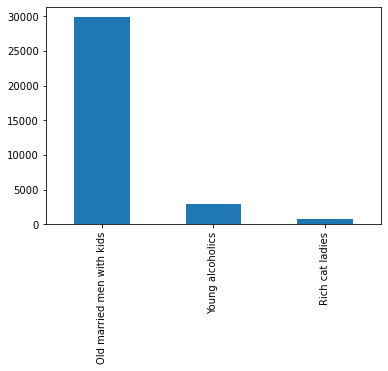

In [27]:
##Create bar chart of profiles
profile_bar=df_profile_unique_rows['profile'].value_counts().plot.bar()

In [28]:
profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'profile_bar.png'))

In [22]:
##Merge smaller df with large df to fill in missing flags (profiles created with department ids did not carry flag to the same user id's purchases in other departments)
insta_profile_fixed=df_insta_smaller.merge(df_profile_unique_rows, on=['user_id'], how='inner')

In [23]:
insta_profile_fixed.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,first_merge,price_range,busiest_slowest,busy_hours,max_order,loyalty_flag,mean_spending,spender_type,median_days_btw_orders,customer_frequency,gender,state,age,date_joined,n_dependants,family_status,income,_merge,region,customer_activity,profile_x,profile_y
0,691089.0,4.0,3.0,4.0,15.0,21.0,1200,1.0,0.0,Vegetable Classics Vegetable Soup,69.0,15.0,10.0,both,Mid-range product,Slowest,Most orders,5.0,New customer,8.205556,Low spender,17.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,Active customer,NaN,Young alcoholics
1,3343014.0,4.0,1.0,6.0,11.0,0.0,2707,4.0,0.0,Complete™ ActionPacs™ Fresh Scent Dishwasher D...,74.0,17.0,11.9,both,Mid-range product,Regular,Most orders,5.0,New customer,8.205556,Low spender,17.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,Active customer,NaN,Young alcoholics
2,3343014.0,4.0,1.0,6.0,11.0,0.0,35469,3.0,0.0,Enchilada Black Bean Vegetable,38.0,1.0,12.9,both,Mid-range product,Regular,Most orders,5.0,New customer,8.205556,Low spender,17.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,Active customer,NaN,Young alcoholics
3,691089.0,4.0,3.0,4.0,15.0,21.0,35469,6.0,1.0,Enchilada Black Bean Vegetable,38.0,1.0,12.9,both,Mid-range product,Slowest,Most orders,5.0,New customer,8.205556,Low spender,17.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,Active customer,NaN,Young alcoholics
4,3343014.0,4.0,1.0,6.0,11.0,0.0,36606,1.0,0.0,Sprouted Multi-Grain Bread,112.0,3.0,9.4,both,Mid-range product,Regular,Most orders,5.0,New customer,8.205556,Low spender,17.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,Active customer,NaN,Young alcoholics


In [24]:
insta_profile_fixed['profile_y'].value_counts(dropna=False)

Old married men with kids    5619004
Young alcoholics              519807
Rich cat ladies               205725
Name: profile_y, dtype: int64

Missing flags have been added for profile_y. Customers outside of the three profiles are removed. This is the column we will use for analysis, while profile_x will be removed.

In [25]:
insta_profile_fixed['profile_x'].value_counts(dropna=False)

Old married men with kids    5619004
NaN                           687034
Young alcoholics               33263
Rich cat ladies                 5235
Name: profile_x, dtype: int64

NaNs in profile_x presumably refer to profiled user's purchases in other departments. Customers outside of the three profiles are removed.

In [26]:
df_insta_smaller['profile'].value_counts(dropna=False)

NaN                          25331110
Old married men with kids     5619004
Young alcoholics                33263
Rich cat ladies                  5235
Name: profile, dtype: int64

Need to determine why the number of records for the three labeled profiles in 'profile_x' do not match the original dataframe after doing a left or inner join (tried both). Profile_x should come from left dataframe, while profile_y should come from right dataframe.  

In [30]:
insta_profile_fixed.drop(['profile_x'], axis=1, inplace=True)

In [31]:
insta_profile_fixed.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,first_merge,price_range,busiest_slowest,busy_hours,max_order,loyalty_flag,mean_spending,spender_type,median_days_btw_orders,customer_frequency,gender,state,age,date_joined,n_dependants,family_status,income,_merge,region,customer_activity,profile_y
0,691089.0,4.0,3.0,4.0,15.0,21.0,1200,1.0,0.0,Vegetable Classics Vegetable Soup,69.0,15.0,10.0,both,Mid-range product,Slowest,Most orders,5.0,New customer,8.205556,Low spender,17.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,Active customer,Young alcoholics
1,3343014.0,4.0,1.0,6.0,11.0,0.0,2707,4.0,0.0,Complete™ ActionPacs™ Fresh Scent Dishwasher D...,74.0,17.0,11.9,both,Mid-range product,Regular,Most orders,5.0,New customer,8.205556,Low spender,17.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,Active customer,Young alcoholics
2,3343014.0,4.0,1.0,6.0,11.0,0.0,35469,3.0,0.0,Enchilada Black Bean Vegetable,38.0,1.0,12.9,both,Mid-range product,Regular,Most orders,5.0,New customer,8.205556,Low spender,17.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,Active customer,Young alcoholics
3,691089.0,4.0,3.0,4.0,15.0,21.0,35469,6.0,1.0,Enchilada Black Bean Vegetable,38.0,1.0,12.9,both,Mid-range product,Slowest,Most orders,5.0,New customer,8.205556,Low spender,17.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,Active customer,Young alcoholics
4,3343014.0,4.0,1.0,6.0,11.0,0.0,36606,1.0,0.0,Sprouted Multi-Grain Bread,112.0,3.0,9.4,both,Mid-range product,Regular,Most orders,5.0,New customer,8.205556,Low spender,17.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,Active customer,Young alcoholics


In [33]:
insta_profile_fixed.rename(columns = {'profile_y' : 'profile'}, inplace = True)

In [34]:
insta_profile_fixed.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,first_merge,price_range,busiest_slowest,busy_hours,max_order,loyalty_flag,mean_spending,spender_type,median_days_btw_orders,customer_frequency,gender,state,age,date_joined,n_dependants,family_status,income,_merge,region,customer_activity,profile
0,691089.0,4.0,3.0,4.0,15.0,21.0,1200,1.0,0.0,Vegetable Classics Vegetable Soup,69.0,15.0,10.0,both,Mid-range product,Slowest,Most orders,5.0,New customer,8.205556,Low spender,17.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,Active customer,Young alcoholics
1,3343014.0,4.0,1.0,6.0,11.0,0.0,2707,4.0,0.0,Complete™ ActionPacs™ Fresh Scent Dishwasher D...,74.0,17.0,11.9,both,Mid-range product,Regular,Most orders,5.0,New customer,8.205556,Low spender,17.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,Active customer,Young alcoholics
2,3343014.0,4.0,1.0,6.0,11.0,0.0,35469,3.0,0.0,Enchilada Black Bean Vegetable,38.0,1.0,12.9,both,Mid-range product,Regular,Most orders,5.0,New customer,8.205556,Low spender,17.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,Active customer,Young alcoholics
3,691089.0,4.0,3.0,4.0,15.0,21.0,35469,6.0,1.0,Enchilada Black Bean Vegetable,38.0,1.0,12.9,both,Mid-range product,Slowest,Most orders,5.0,New customer,8.205556,Low spender,17.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,Active customer,Young alcoholics
4,3343014.0,4.0,1.0,6.0,11.0,0.0,36606,1.0,0.0,Sprouted Multi-Grain Bread,112.0,3.0,9.4,both,Mid-range product,Regular,Most orders,5.0,New customer,8.205556,Low spender,17.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both,South,Active customer,Young alcoholics


In [36]:
##Creating descriptive statistics for each profile on order frequency
insta_profile_fixed.groupby('profile').agg({'median_days_btw_orders': ['mean', 'min', 'max']})

median_days_btw_orders           
                                            mean  min   max
profile                                                    
Old married men with kids               9.398556  0.0  30.0
Rich cat ladies                         8.603597  0.0  30.0
Young alcoholics                        9.062512  0.0  30.0

In [37]:
##Creating descriptive statistics for each profile on total number of orders
insta_profile_fixed.groupby('profile').agg({'max_order': ['mean', 'min', 'max']})

max_order           
                                mean  min   max
profile                                        
Old married men with kids  33.915371  5.0  99.0
Rich cat ladies            38.670521  5.0  99.0
Young alcoholics           33.007626  5.0  99.0

In [38]:
##Creating descriptive statistics for each profile on expenditure
insta_profile_fixed.groupby('profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                               mean  min   max
profile                                       
Old married men with kids  7.792085  1.0  25.0
Rich cat ladies            7.871200  1.0  25.0
Young alcoholics           7.753587  1.0  25.0

In [47]:
profile_order_freq=insta_profile_fixed.groupby('profile').agg({'median_days_btw_orders': ['mean', 'min', 'max']})

In [48]:
profile_order_freq.to_clipboard()

In [49]:
profile_total_orders=insta_profile_fixed.groupby('profile').agg({'max_order': ['mean', 'min', 'max']})

In [50]:
profile_total_orders.to_clipboard()

In [51]:
profile_expend=insta_profile_fixed.groupby('profile').agg({'prices': ['mean', 'min', 'max']})

In [52]:
profile_expend.to_clipboard()

In [53]:
profile_region_crosstab = pd.crosstab(insta_profile_fixed['region'], insta_profile_fixed['profile'], dropna = False)

In [54]:
profile_region_crosstab

profile,Old married men with kids,Rich cat ladies,Young alcoholics
region,,,
Midwest,1297466,49517,118684
Northeast,1046609,36237,89468
South,1863689,75147,174210
West,1411240,44824,137445


In [55]:
profile_region_crosstab.to_clipboard()

In [56]:
profile_dept_crosstab=pd.crosstab(insta_profile_fixed['department_id'], insta_profile_fixed['profile'], dropna = False)

In [57]:
profile_dept_crosstab

profile,Old married men with kids,Rich cat ladies,Young alcoholics
department_id,,,
1.0,385547,16363,34481
2.0,6167,302,1609
3.0,201217,8116,24093
4.0,1652231,47425,92759
5.0,23419,1556,33263
6.0,46661,1862,4998
7.0,471537,19048,56152
8.0,17443,5235,3836
9.0,149383,6152,14166


In [58]:
profile_dept_crosstab.to_clipboard()

In [59]:
insta_profile_fixed.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'customer_profiles_fixed.pkl'))